In [4]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import  scipy.stats as stats
from sklearn.metrics import mean_squared_error,mean_absolute_error
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3858,3859,15658449,Chizoba,695,France,Male,45,9,43134.65,1,0,1,77330.35,0
1136,1137,15614220,Benson,750,France,Male,22,5,0.00,2,0,1,105125.65,0
2931,2932,15776733,Wilson,638,Germany,Female,37,7,124513.66,2,1,0,158610.89,0
2348,2349,15775203,Chia,824,France,Male,45,3,129209.48,1,0,0,60151.77,0
5907,5908,15813862,Yevseyev,526,Spain,Male,66,7,132044.60,2,1,1,158365.89,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.set_index('RowNumber',inplace=True)

In [11]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.select_dtypes(include='object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [13]:
# cek nilai unique di kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [15]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [45]:
number = ['CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts',  
       'EstimatedSalary', 'Exited']

kategori = ['CustomerId','Surname','Geography',
            'Gender','IsActiveMember','HasCrCard','Exited']

In [47]:
df[number].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


In [46]:
df[kategori].describe()

,CustomerId,IsActiveMember,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,0.515100,0.70550,0.203700
std,7.193619e+04,0.499797,0.45584,0.402769
min,1.556570e+07,0.000000,0.00000,0.000000
25%,1.562853e+07,0.000000,0.00000,0.000000
50%,1.569074e+07,1.000000,1.00000,0.000000
75%,1.575323e+07,1.000000,1.00000,0.000000
max,1.581569e+07,1.000000,1.00000,1.000000


### Univariate Analysis

A. Distribusi Data

<function matplotlib.pyplot.show(close=None, block=None)>

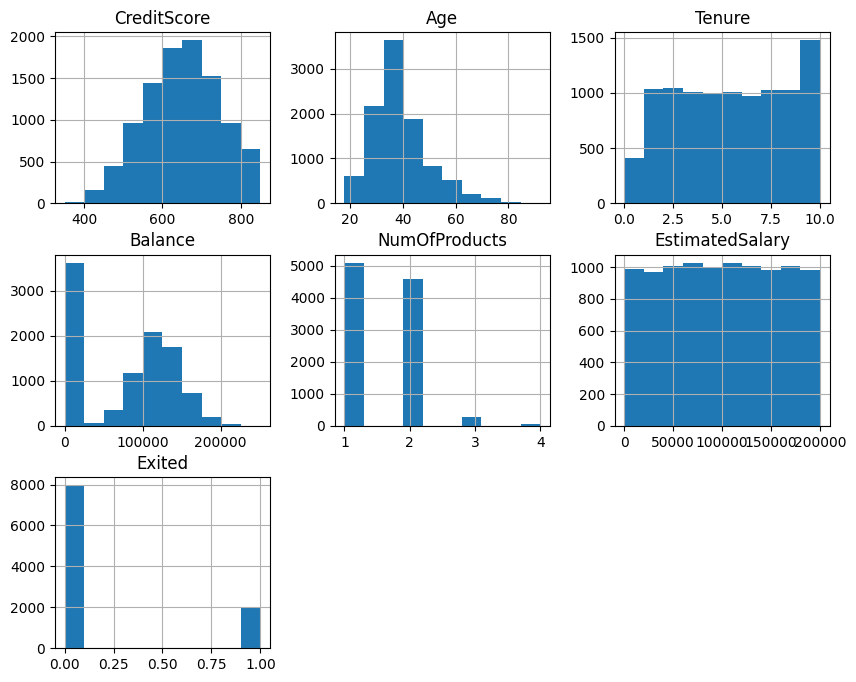

In [49]:
df[number].hist(figsize=(10,8))
plt.show

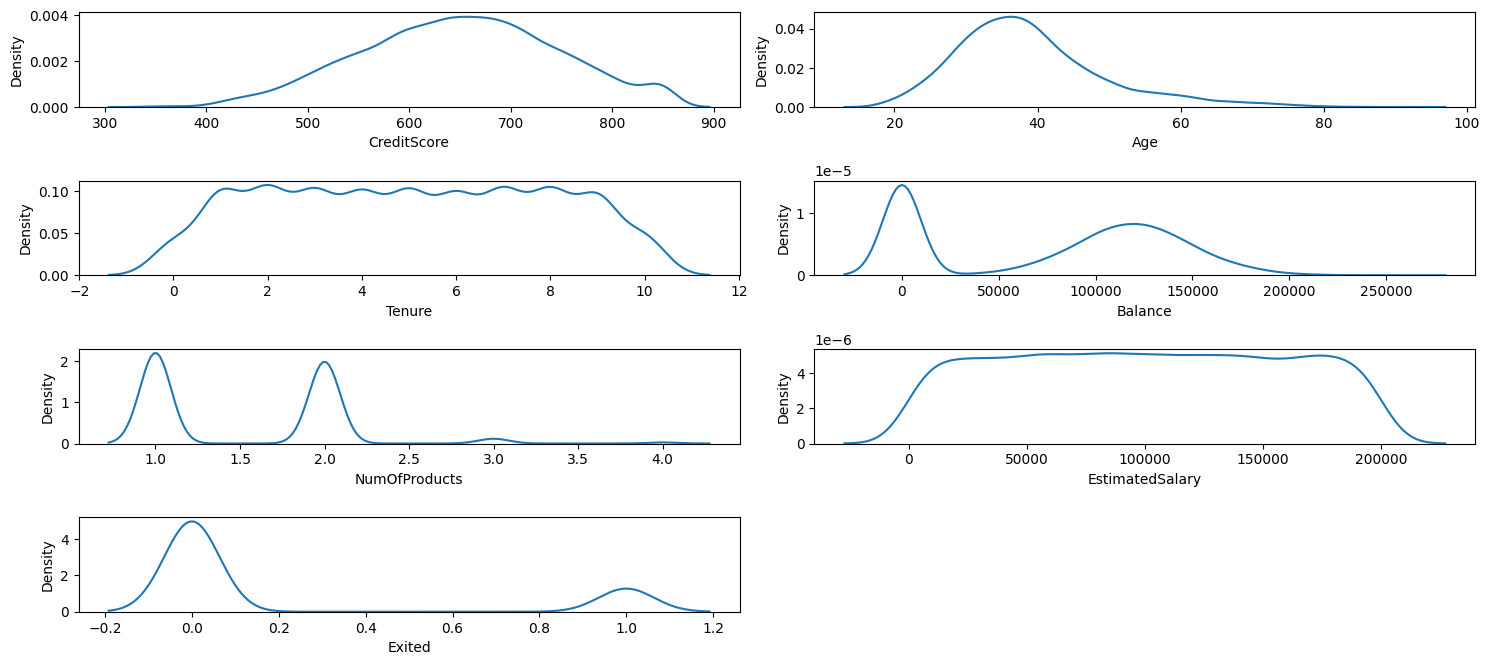

In [50]:
# Visualize skewness using seaborn
plt.figure(figsize=(15, 8))

for i in range(0, len(number)):
    plt.subplot(5, 2, 1+i)
    sns.kdeplot(df[number[i]])
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
plt.show()

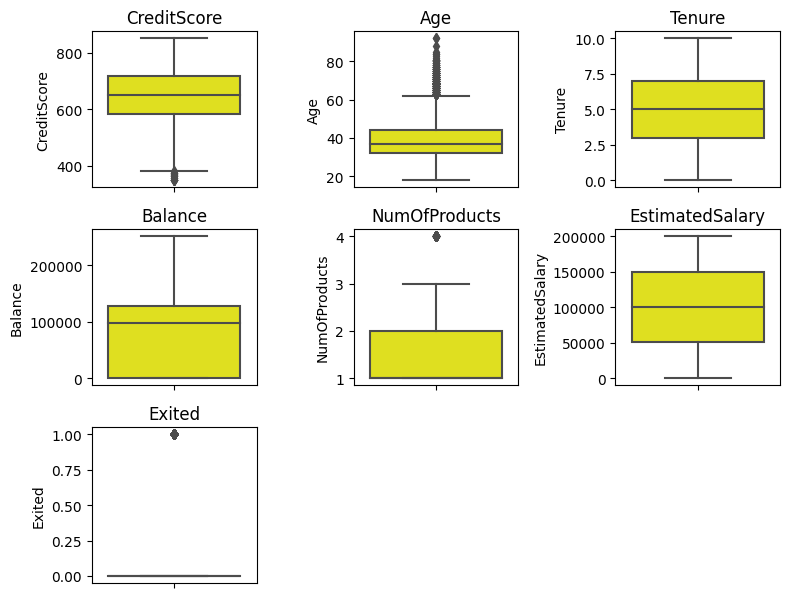

In [51]:
plt.figure(figsize=(8, 10))
for i, column in enumerate(number, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column], color='yellow', orient='v')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

There is some outlier in CreditScore, NumOfProducts. We will handle it later

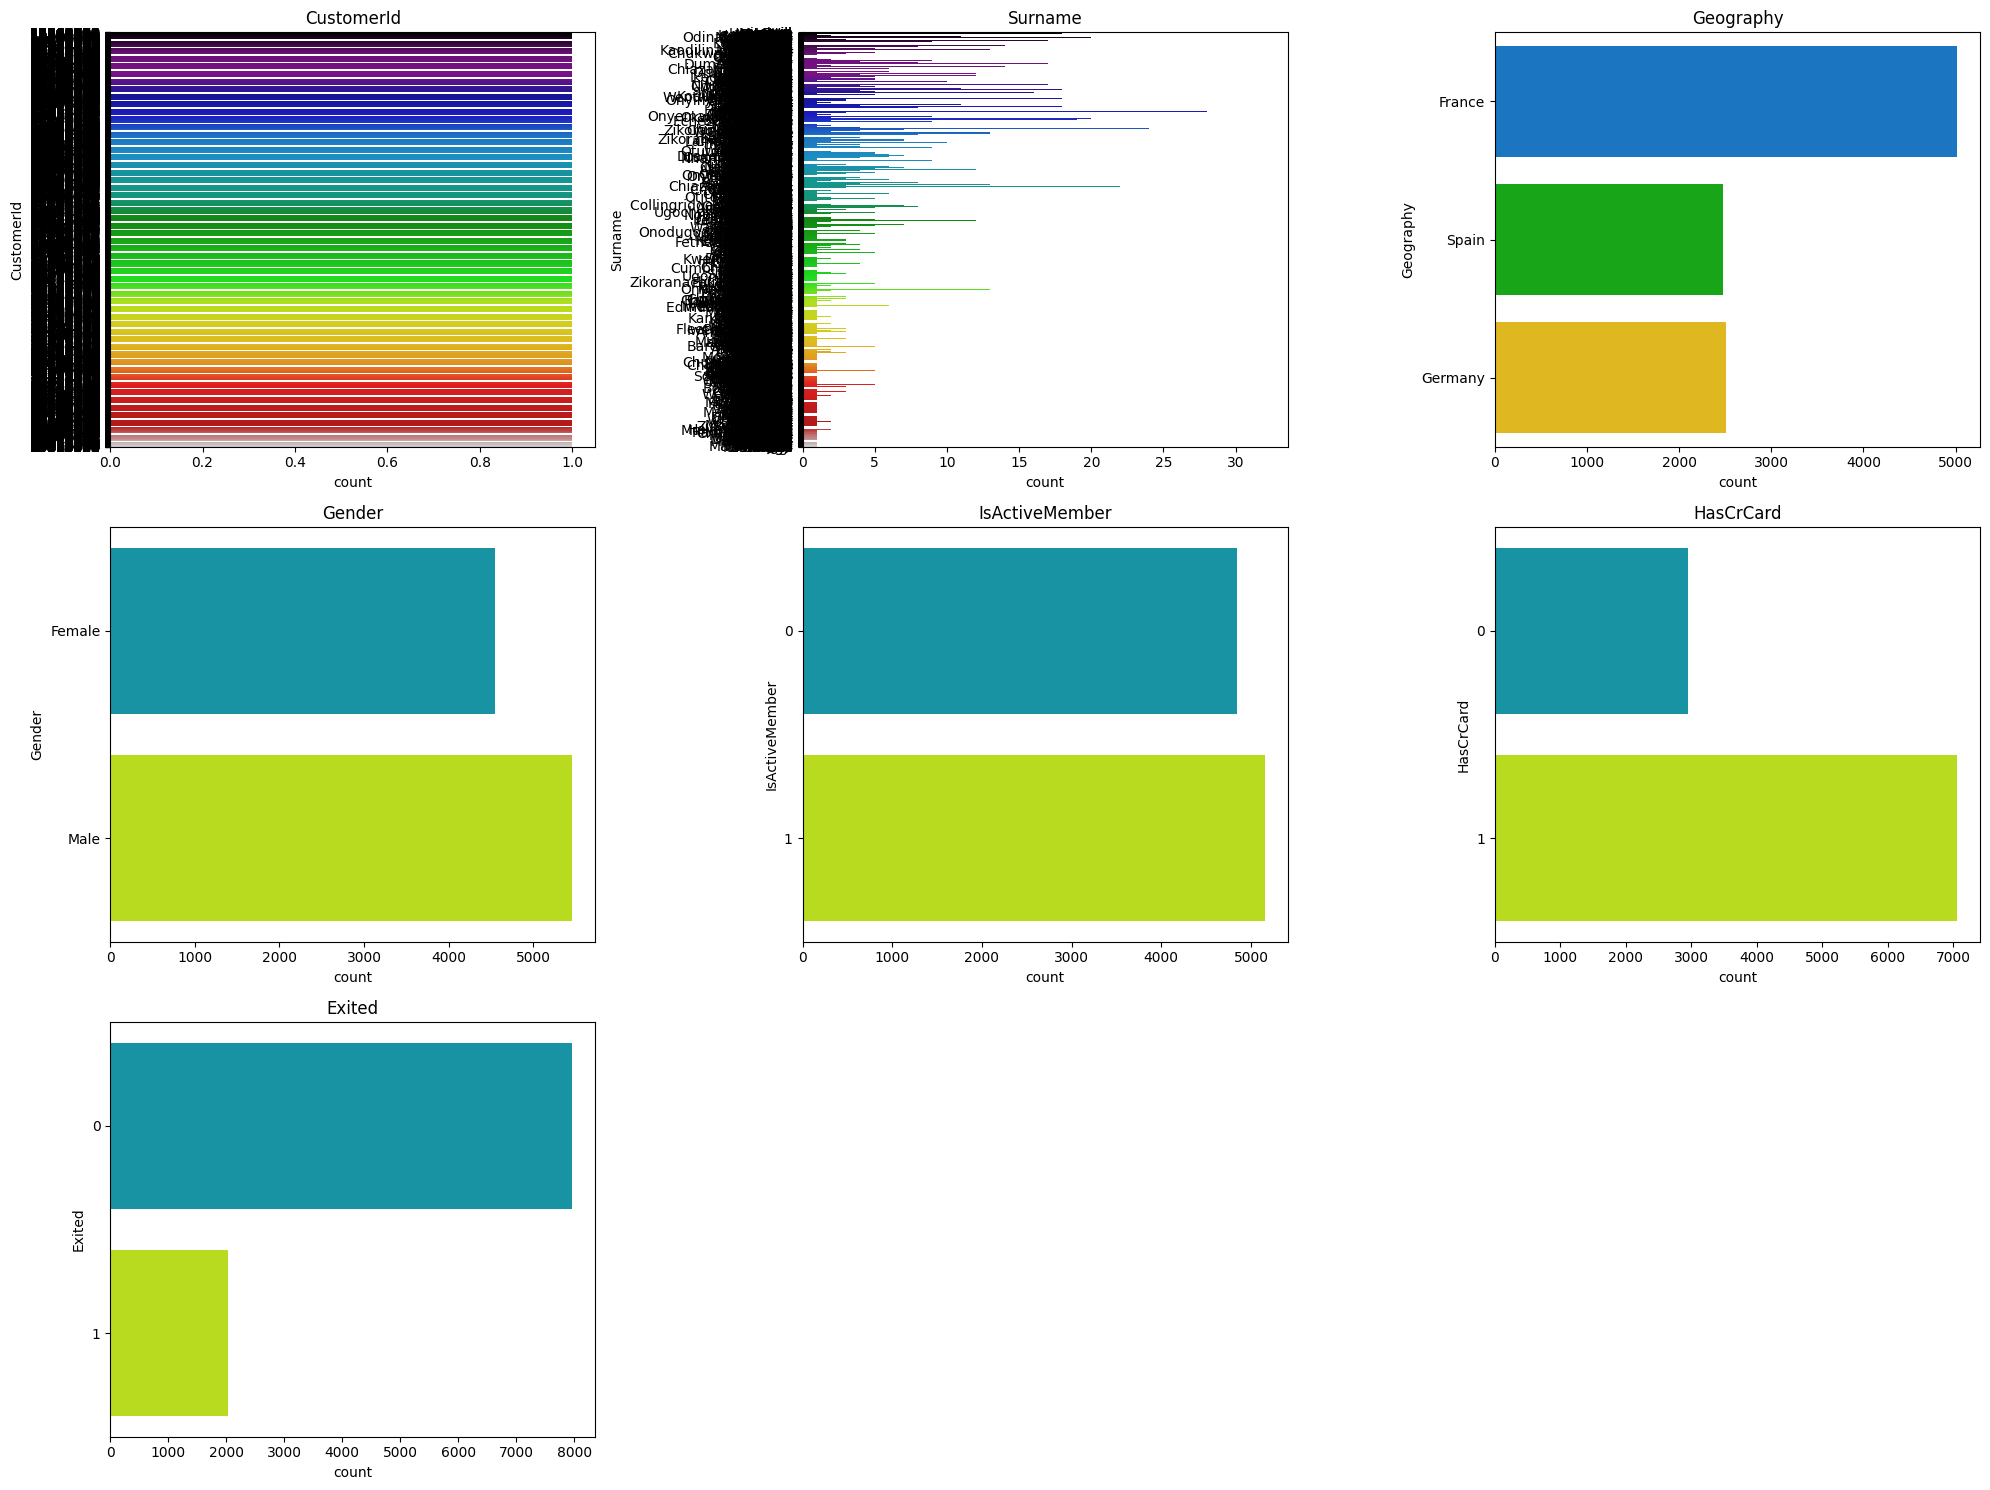

In [52]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(kategori, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, y=column, palette="nipy_spectral")
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

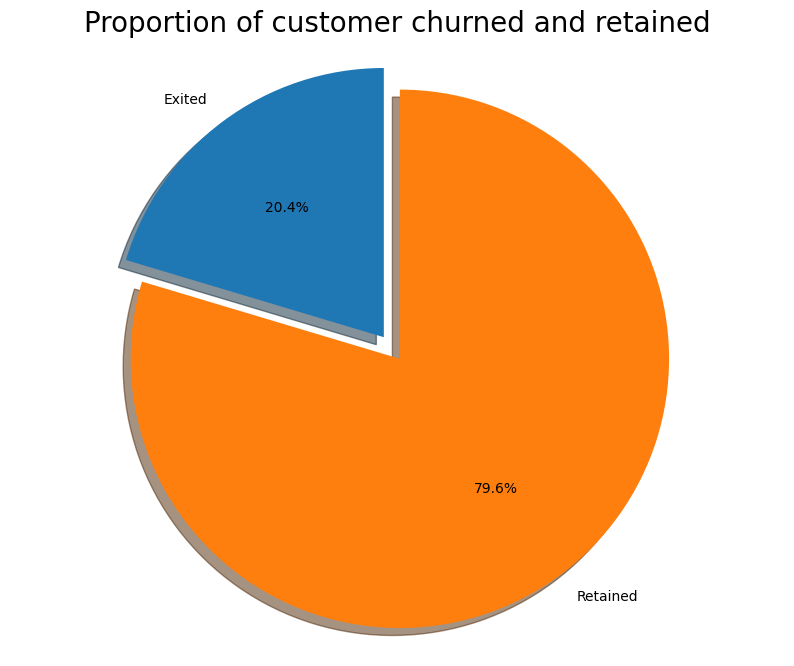

In [44]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


1. There some feature in the dataset we will excluded like CustomerId and Surname because specific to a customer.
2. we will handle outlier from CreditScore, Age, and NumOfProduct
3. We see in the pie chart the proportion of customer who Exited was 20.4% and Retained 79.6%

### Multivariate Analysis

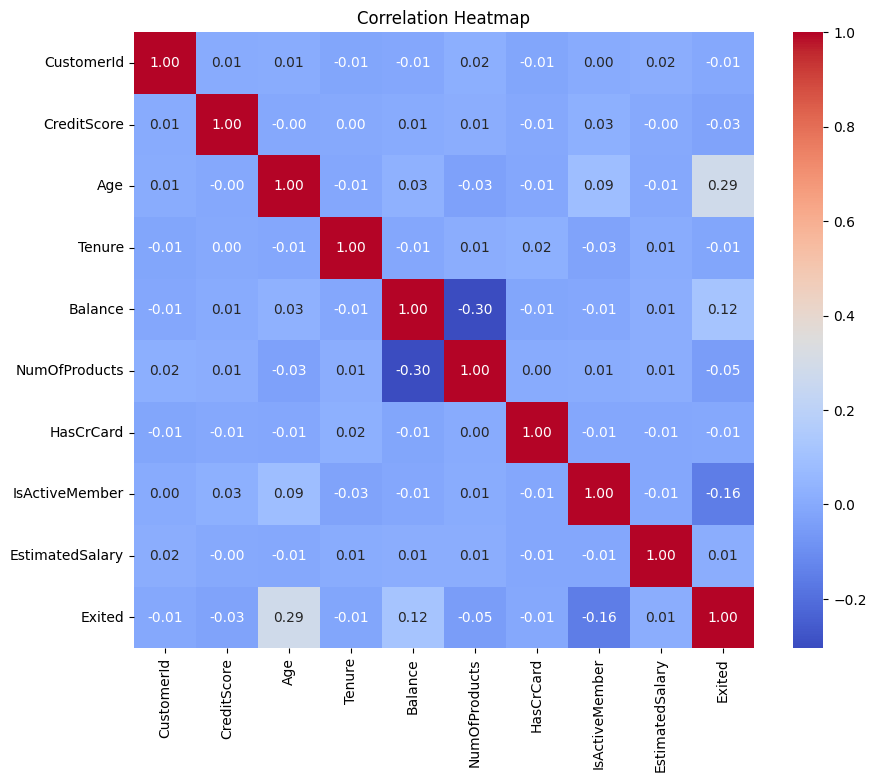

In [43]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing Data

There is some feature CustomerId and Surname are specific to a customer we will excluded that feature.